In [48]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA


In [41]:
df = pd.read_csv('/Users/surajojha/Downloads/daily-total-female-births-CA - daily-total-female-births-CA.csv')

In [51]:
df.head()

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [52]:
df.shape

(365, 2)

In [53]:
df.describe()

,births
count,365.000000
mean,41.980822
std,7.348257
min,23.000000
25%,37.000000
50%,42.000000
75%,46.000000
max,73.000000


In [54]:
# Print the column names
print(df.columns)

Index(['date', 'births'], dtype='object')


# Exploratory Data Analysis (EDA)

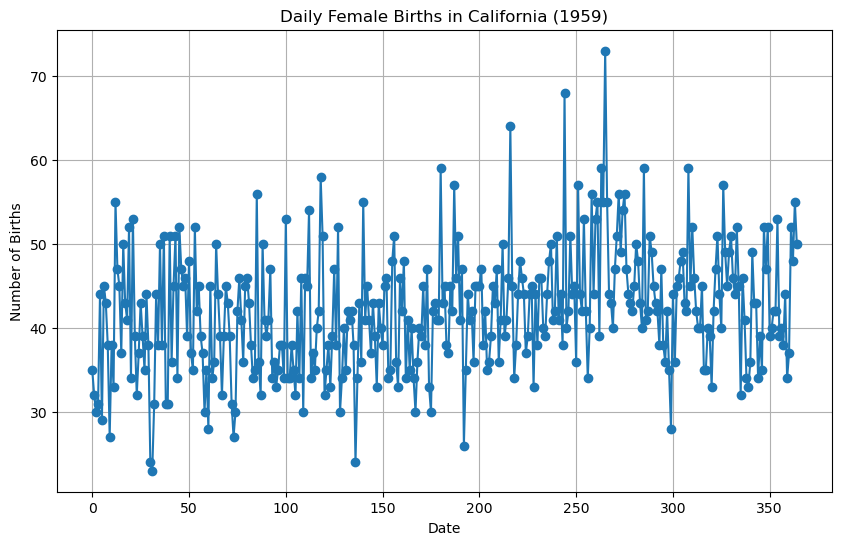

In [55]:
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['births'], marker='o', linestyle='-')
plt.title('Daily Female Births in California (1959)')
plt.xlabel('Date')
plt.ylabel('Number of Births')
plt.grid(True)
plt.show()


# Checking for stationarity and applying suitable methods if it’s not stationary

In [56]:
def adf_test(series):
    result = adfuller(series)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value}')

print('ADF Test for Stationarity:')
adf_test(df['births'])

ADF Test for Stationarity:
ADF Statistic: -4.808291253559766
p-value: 5.243412990149813e-05
Critical Values:
	1%: -3.448748905151901
	5%: -2.8696473721448728
	10%: -2.5710891239349585


# uilding forecasting time series models:

In [57]:
model = ARIMA(df['births'], order=(5,1,0))
model_fit = model.fit()
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                 births   No. Observations:                  365
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -1245.097
Date:                Mon, 15 Apr 2024   AIC                           2502.194
Time:                        01:23:03   BIC                           2525.577
Sample:                             0   HQIC                          2511.488
                                - 365                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7237      0.057    -12.664      0.000      -0.836      -0.612
ar.L2         -0.5426      0.063     -8.550      0.000      -0.667      -0.418
ar.L3         -0.4115      0.068     -6.036      0.0

# Predicting the female births for a specific period with the trained model:

In [61]:
forecast_steps = 10  # Number of steps (days) to forecast into the future

# Forecasting
forecast = model_fit.forecast(steps=forecast_steps)

# Print the forecasted values
print("Forecasted number of female births for the next", forecast_steps, "days:")
print(forecast)

Forecasted number of female births for the next 10 days:
365    46.704518
366    47.815515
367    49.446992
368    49.404189
369    49.791674
370    49.039290
371    48.755213
372    48.976532
373    49.175218
374    49.186229
Name: predicted_mean, dtype: float64
